In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('HR.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#2 Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# Мода для переменных

In [7]:
data_columns=['satisfaction_level', 'last_evaluation','number_project', 'average_montly_hours','time_spend_company', 'Work_accident', 'left','promotion_last_5years']
for s in data_columns:
    s_val = [float(w) for w in data[s]]
    counts = {}
    for p in s_val:
        if p not in counts:
            counts[p] = 1
        else:
            counts[p] += 1

    maxp = 0
    mode = None
    for k, v in counts.items():
        if maxp < v:
            maxp = v
            mode = k
    print('mode {:}: {:}'.format(s,mode))

mode satisfaction_level: 0.1
mode last_evaluation: 0.55
mode number_project: 4.0
mode average_montly_hours: 135.0
mode time_spend_company: 3.0
mode Work_accident: 0.0
mode left: 0.0
mode promotion_last_5years: 0.0


In [8]:
#3 Рассчитать и визуализировать корреляционную матрицу для переменных

In [9]:
corr = data.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


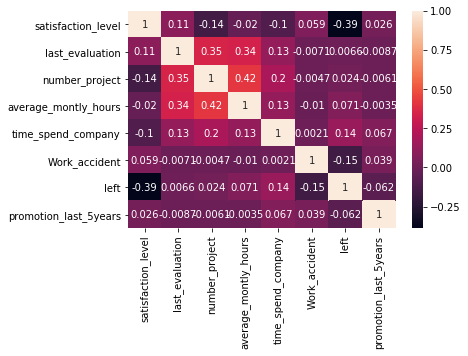

In [10]:
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [11]:
#4 Визуализировать несколько взаимосвязей между переменными

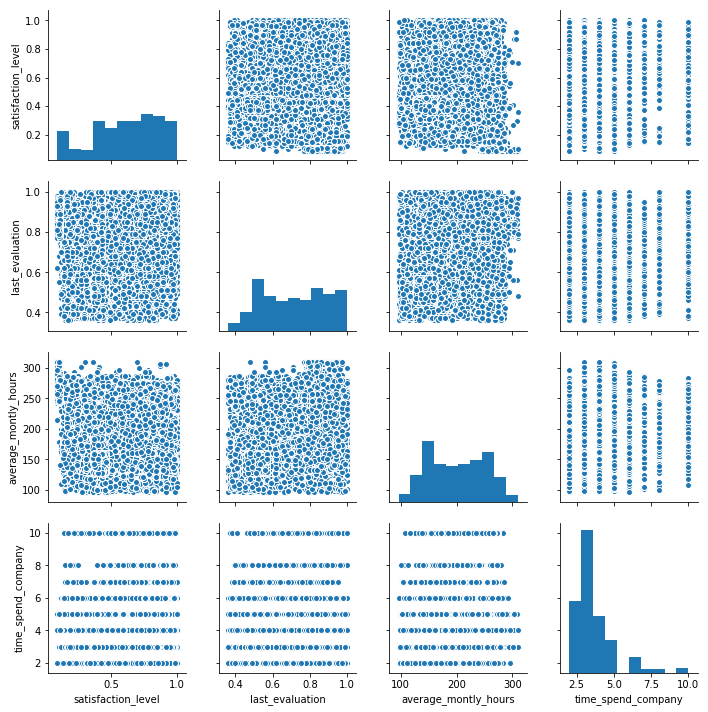

In [12]:
sns.pairplot(data, vars=['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company'],
                 kind='scatter')

In [13]:
#5 С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [14]:
management = data[data['sales'] == 'management']['promotion_last_5years']
IT = data[data['sales'] == 'IT']['promotion_last_5years']
marketing = data[data['sales'] == 'marketing']['promotion_last_5years']
hr  = data[data['sales'] == 'hr']['promotion_last_5years']
sales = data[data['sales'] == 'sales']['promotion_last_5years']

stats.ttest_ind(management, IT)

Ttest_indResult(statistic=11.721939317008195, pvalue=1.1528212127663777e-30)

In [15]:
stats.ttest_ind(hr, sales)

Ttest_indResult(statistic=-0.6365305293313471, pvalue=0.5244605618676241)

In [16]:
stats.ttest_ind(marketing, management)

Ttest_indResult(statistic=-4.315681242430932, pvalue=1.696255474115383e-05)

In [17]:
#6 Рассчитать сколько работников работает в каждом департаменте

In [18]:
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [19]:
#7 Показать распределение сотрудников по зарплатам

In [20]:
data.groupby('salary').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales
salary,,,,,,,,,
high,1237,1237,1237,1237,1237,1237,1237,1237,1237
low,7316,7316,7316,7316,7316,7316,7316,7316,7316
medium,6446,6446,6446,6446,6446,6446,6446,6446,6446


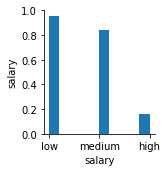

In [21]:
sns.pairplot(data, vars=['salary'],
                 kind='scatter')

In [22]:
#8 Показать распределение сотрудников по зарплатам совместно с департаментами

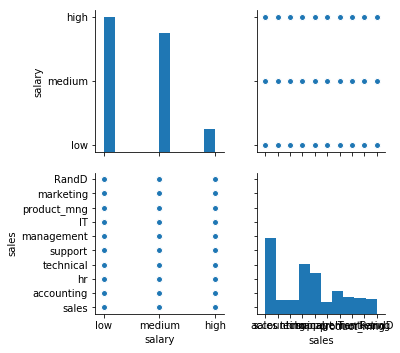

In [23]:
sns.pairplot(data, vars=['salary','sales'],
                 kind='scatter')

In [24]:
data.pivot_table(index = 'sales', columns = 'salary', values = 'average_montly_hours', aggfunc = 'count', fill_value = 0)

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [25]:
#9 Сколько сотрудников покинули компанию

In [26]:
data[data['left'] == 1].count()

satisfaction_level       3571
last_evaluation          3571
number_project           3571
average_montly_hours     3571
time_spend_company       3571
Work_accident            3571
left                     3571
promotion_last_5years    3571
sales                    3571
salary                   3571
dtype: int64

In [27]:
# 10 Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [28]:
# Проверка зависимости ухода из компании от времени проведенного на работе
left_montly_hours = data[data['left']==1]['average_montly_hours']
not_left_montly_hours = data[data['left']==0]['average_montly_hours']

stats.ttest_ind(left_montly_hours, not_left_montly_hours)

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

In [29]:
#  Проверка зависимости ухода из компании от уровня удовлетворенности работы
left_satisfaction_level = data[data['left'] == 1]['satisfaction_level']
not_left_satisfaction_level = data[data['left'] == 0]['satisfaction_level']

stats.ttest_ind(not_left_satisfaction_level, left_satisfaction_level)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

In [30]:
#  Проверка зависимости ухода из компании от уровня заработной платы
def var_salary (row):
    if row['salary'] == 'low':
        salary_rasp = 1
    elif row['salary'] == 'medium':
        salary_rasp = 2
    else:
        salary_rasp = 3
    return salary_rasp
data['salary_rasp'] = data.apply(var_salary, axis=1)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_rasp
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [31]:
left_salary = data[data['left']==1]['salary_rasp']
not_left_salary = data[data['left']==0]['salary_rasp']

stats.ttest_ind(left_montly_hours, not_left_montly_hours)

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)